In [199]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from LIN_REG.linreg import linear_regression_multi_graph, lin_prediction_error, linearRegression, ridgeRegression, lassoRegression, polynomialRegression,linear_regression_multi_graph_comb, hata_prediction_error, mhata_prediction_error
from LIN_REG.data_loader import data_loader_pathloss, describeData
from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph, mlp_train_multi_graph_comb, mlp_train_multi_3dgraph_comb
from MLP.utils import data_loader_pathloss, describeData, data_loader_pathloss_with_freq, data_loader_all_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss_with_freq('data/PLdata_bh_34.mat',3400,True)
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss_with_freq('data/PLdata_bh_53.mat',5300,True)
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss_with_freq('data/PLdata_bh_64.mat',6400,True)

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

df_train_bh = pd.DataFrame({'X_train1':X_train_bh[:,0],'X_train2':X_train_bh[:,1], 'y_train':y_train_bh}).sort_values(by=['X_train1'])
X_train_bh = np.concatenate((np.array(df_train_bh['X_train1']).reshape(-1,1),np.array(df_train_bh['X_train2']).reshape(-1,1)),axis=1)
y_train_bh = np.array(df_train_bh['y_train'])

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)
df_val_bh = pd.DataFrame({'X_val1':X_val_bh[:,0],'X_val2':X_val_bh[:,1], 'y_val':y_val_bh}).sort_values(by=['X_val1'])
X_val_bh = np.concatenate((np.array(df_val_bh['X_val1']).reshape(-1,1),np.array(df_val_bh['X_val2']).reshape(-1,1)),axis=1)
y_val_bh = np.array(df_val_bh['y_val'])

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)
df_test_bh = pd.DataFrame({'X_test1':X_test_bh[:,0],'X_test2':X_test_bh[:,1], 'y_test':y_test_bh}).sort_values(by=['X_test1'])
X_test_bh = np.concatenate((np.array(df_test_bh['X_test1']).reshape(-1,1),np.array(df_test_bh['X_test2']).reshape(-1,1)),axis=1)
y_test_bh = np.array(df_test_bh['y_test'])

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss_with_freq('data/PLdata_ma_34.mat',3400,True)
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss_with_freq('data/PLdata_ma_53.mat',5300,True)
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss_with_freq('data/PLdata_ma_64.mat',6400,True)

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)
df_train_ma = pd.DataFrame({'X_train1':X_train_ma[:,0],'X_train2':X_train_ma[:,1], 'y_train':y_train_ma}).sort_values(by=['X_train1'])
X_train_ma = np.concatenate((np.array(df_train_ma['X_train1']).reshape(-1,1),np.array(df_train_ma['X_train2']).reshape(-1,1)),axis=1)
y_train_ma = np.array(df_train_ma['y_train'])

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)
df_val_ma = pd.DataFrame({'X_val1':X_val_ma[:,0],'X_val2':X_val_ma[:,1], 'y_val':y_val_ma}).sort_values(by=['X_val1'])
X_val_ma = np.concatenate((np.array(df_val_ma['X_val1']).reshape(-1,1),np.array(df_val_ma['X_val2']).reshape(-1,1)),axis=1)
y_val_ma = np.array(df_val_ma['y_val'])

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)
df_test_ma = pd.DataFrame({'X_test1':X_test_ma[:,0],'X_test2':X_test_ma[:,1], 'y_test':y_test_ma}).sort_values(by=['X_test1'])
X_test_ma = np.concatenate((np.array(df_test_ma['X_test1']).reshape(-1,1),np.array(df_test_ma['X_test2']).reshape(-1,1)),axis=1)
y_test_ma = np.array(df_test_ma['y_test'])

%autoreload
dataX_bh = list()
dataY_bh = list()
dataX_bh.append(X_train_bh_34)
dataY_bh.append(y_train_bh_34)
dataX_bh.append(X_train_bh_53)
dataY_bh.append(y_train_bh_53)
dataX_bh.append(X_train_bh_64)
dataY_bh.append(y_train_bh_64)

dataX_ma = list()
dataY_ma = list()
dataX_ma.append(X_train_ma_34)
dataY_ma.append(y_train_ma_34)
dataX_ma.append(X_train_ma_53)
dataY_ma.append(y_train_ma_53)
dataX_ma.append(X_train_ma_64)
dataY_ma.append(y_train_ma_64)

print(X_train_bh)
print(np.log10(X_train_bh))

[[1.69917874e+00 3.40000000e+03]
 [1.69921533e+00 5.30000000e+03]
 [1.69932600e+00 6.40000000e+03]
 ...
 [2.66793893e+00 3.40000000e+03]
 [2.66794029e+00 3.40000000e+03]
 [2.66798139e+00 3.40000000e+03]]
[[0.23023907 3.53147892]
 [0.23024842 3.72427587]
 [0.2302767  3.80617997]
 ...
 [0.42617588 3.53147892]
 [0.4261761  3.53147892]
 [0.4261828  3.53147892]]


Estimated coefficients[w1(log-dist),w2(freq)]: [0.06224715 0.00183314]
Estimated bias: 90.92682602601423
<Bundang>


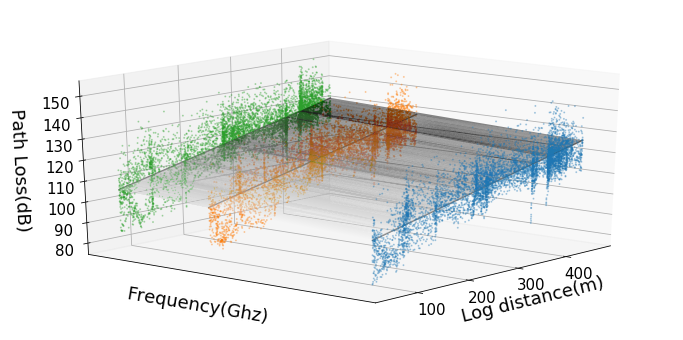

RMSE(dB),train error,test error
3.4Ghz,7.34726,7.09815
5.3Ghz,7.38717,7.25290
6.4Ghz,7.68410,7.78206
Overall,7.48373,7.37998


In [228]:
%autoreload
model = None
model = linearRegression(X_train_bh, y_train_bh)
print("Estimated coefficients[w1(log-dist),w2(freq)]: " + str(model.coef_))
print("Estimated bias: " + str(model.intercept_))

print("<Bundang>")
# mlp_train_multi_3dgraph_comb(model, X, Y, Xscatter)
mlp_train_multi_3dgraph_comb(model, dataX_bh, dataY_bh, X_train_bh)
lin_bh_stat = np.array([lin_prediction_error(model,X_train_bh_34, y_train_bh_34),lin_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 lin_prediction_error(model,X_train_bh_53, y_train_bh_53),lin_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 lin_prediction_error(model,X_train_bh_64, y_train_bh_64),lin_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 lin_prediction_error(model,X_train_bh, y_train_bh), lin_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(lin_bh_stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

Estimated coefficients[w1(log-dist),w2(freq)]: [3.65786176e+01 2.06975014e-03]
Estimated bias: 23.04278296009116
<Mokdong>


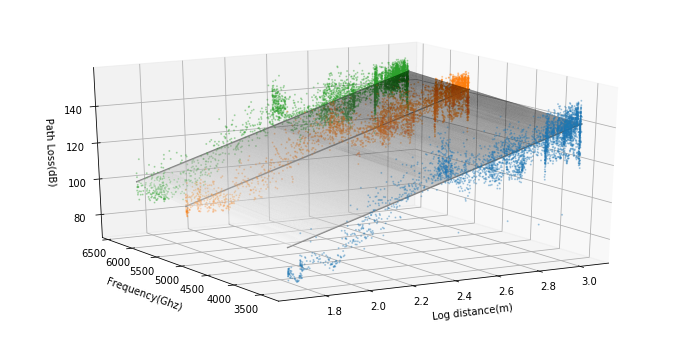

RMSE(dB),train error,test error
3.4Ghz,7.90436,7.40279
5.3Ghz,6.71676,6.70706
6.4Ghz,6.96158,7.07656
Overall,7.19245,7.05686


In [133]:
%autoreload
model = None
model = linearRegression(X_train_ma, y_train_ma)
print("Estimated coefficients[w1(log-dist),w2(freq)]: " + str(model.coef_))
print("Estimated bias: " + str(model.intercept_))

print("<Mokdong>")
# mlp_train_multi_3dgraph_comb(model, X, Y, Xscatter)
mlp_train_multi_3dgraph_comb(model, dataX_ma, dataY_ma, X_train_ma)

lin_ma_stat = np.array([lin_prediction_error(model,X_train_ma_34, y_train_ma_34),lin_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 lin_prediction_error(model,X_train_ma_53, y_train_ma_53),lin_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 lin_prediction_error(model,X_train_ma_64, y_train_ma_64),lin_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 lin_prediction_error(model,X_train_ma, y_train_ma), lin_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(lin_ma_stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

Estimated coefficients[w1(log-dist),w2(freq)]: [31.351848  19.3546755]
Estimated bias: -28.768246400130167
<Bundang>


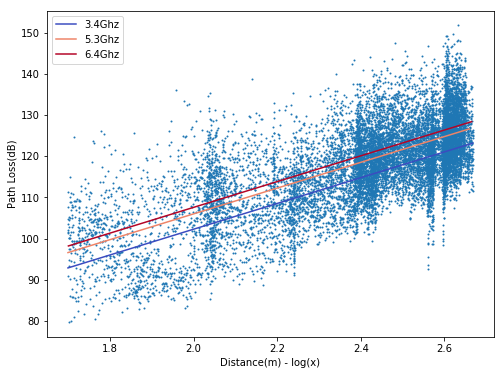

RMSE(dB),train error,test error
3.4Ghz,7.11919,6.67021
5.3Ghz,7.18929,7.21692
6.4Ghz,7.67453,7.33354
Overall,7.32842,7.08003


In [29]:
%autoreload
model = None
model = ridgeRegression(X_train_bh, y_train_bh,X_val_bh, y_val_bh,X_test_bh, y_test_bh,'linear regression')
print("Estimated coefficients[w1(log-dist),w2(freq)]: " + str(model.coef_))
print("Estimated bias: " + str(model.intercept_))

print("<Bundang>")
linear_regression_multi_graph_comb(model, dataX_bh, X_train_bh[:,0], y_train_bh)

rid_bh_stat = np.array([lin_prediction_error(model,X_train_bh_34, y_train_bh_34),lin_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 lin_prediction_error(model,X_train_bh_53, y_train_bh_53),lin_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 lin_prediction_error(model,X_train_bh_64, y_train_bh_64),lin_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 lin_prediction_error(model,X_train_bh, y_train_bh), lin_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(rid_bh_stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

In [230]:
%autoreload
X_train_bh_34, y_train_bh_34 = data_loader_all_with_freq('data/PLdata_bh_34.mat',3400,False)
X_train_bh_53, y_train_bh_53 = data_loader_all_with_freq('data/PLdata_bh_53.mat',5300,False)
X_train_bh_64, y_train_bh_64 = data_loader_all_with_freq('data/PLdata_bh_64.mat',6400,False)

X_train_ma_34, y_train_ma_34 = data_loader_all_with_freq('data/PLdata_ma_34.mat',3400,False)
X_train_ma_53, y_train_ma_53 = data_loader_all_with_freq('data/PLdata_ma_53.mat',5300,False)
X_train_ma_64, y_train_ma_64 = data_loader_all_with_freq('data/PLdata_ma_64.mat',6400,False)

%autoreload
dataX_bh = list()
dataY_bh = list()
dataX_bh.append(X_train_bh_34)
dataY_bh.append(y_train_bh_34)
dataX_bh.append(X_train_bh_53)
dataY_bh.append(y_train_bh_53)
dataX_bh.append(X_train_bh_64)
dataY_bh.append(y_train_bh_64)

dataX_ma = list()
dataY_ma = list()
dataX_ma.append(X_train_ma_34)
dataY_ma.append(y_train_ma_34)
dataX_ma.append(X_train_ma_53)
dataY_ma.append(y_train_ma_53)
dataX_ma.append(X_train_ma_64)
dataY_ma.append(y_train_ma_64)

print(X_train_bh)
print(np.log10(X_train_bh))

print(len(X_train_bh))
print(len(X_train_ma))
print(len(X_train_ma)+len(X_train_ma))


[[  50.02403717 3400.        ]
 [  50.02825198 5300.        ]
 [  50.0410019  6400.        ]
 ...
 [ 465.52062732 3400.        ]
 [ 465.56614842 3400.        ]
 [ 465.6102156  3400.        ]]
[[1.69917874 3.53147892]
 [1.69921533 3.72427587]
 [1.699326   3.80617997]
 ...
 [2.66793893 3.53147892]
 [2.66798139 3.53147892]
 [2.6680225  3.53147892]]
13875
11080
22160


In [216]:
%autoreload
print("Bundang")
h_t = 19

hata_bh_stat = np.array([mhata_prediction_error(X_train_bh_34, y_train_bh_34, h_t, 'A'),
                 mhata_prediction_error(X_train_bh_53, y_train_bh_53, h_t, 'A'),
                 mhata_prediction_error(X_train_bh_64, y_train_bh_64, h_t, 'A'),
                 mhata_prediction_error(X_train_bh, y_train_bh, h_t, 'A')])

(pd.DataFrame(hata_bh_stat.reshape((4,1)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['test error'],name='RMSE(dB)')))

Bundang


RMSE(dB),test error
3.4Ghz,7.81199
5.3Ghz,7.18454
6.4Ghz,8.03397
Overall,7.69133


In [217]:
%autoreload
print("Mokdong")
h_t = 50

hata_ma_stat = np.array([mhata_prediction_error(X_train_ma_34, y_train_ma_34, h_t, 'B'),
                 mhata_prediction_error(X_train_ma_53, y_train_ma_53, h_t, 'B'),
                 mhata_prediction_error(X_train_ma_64, y_train_ma_64, h_t, 'B'),
                 mhata_prediction_error(X_train_ma, y_train_ma, h_t, 'B')])

(pd.DataFrame(hata_ma_stat.reshape((4,1)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['test error'],name='RMSE(dB)')))

Mokdong


RMSE(dB),test error
3.4Ghz,8.10528
5.3Ghz,7.37937
6.4Ghz,7.92057
Overall,7.79879


Estimated coefficients[w1(log-dist),w2(freq)]: [36.38741138 23.00632583]
Estimated bias: -50.910115344035916
<Mokdong>


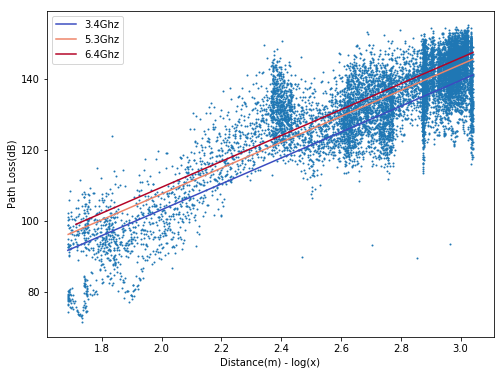

RMSE(dB),train error,test error
3.4Ghz,7.87493,7.74510
5.3Ghz,6.61930,6.62556
6.4Ghz,6.97192,6.38671
Overall,7.15409,6.92368


In [30]:
%autoreload
model = None
model = ridgeRegression(X_train_ma, y_train_ma, X_val_ma, y_val_ma, X_test_ma, y_test_ma,'linear regression')
print("Estimated coefficients[w1(log-dist),w2(freq)]: " + str(model.coef_))
print("Estimated bias: " + str(model.intercept_))

print("<Mokdong>")
linear_regression_multi_graph_comb(model, dataX_ma, X_train_ma[:,0], y_train_ma)

rid_ma_stat = np.array([lin_prediction_error(model,X_train_ma_34, y_train_ma_34),lin_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 lin_prediction_error(model,X_train_ma_53, y_train_ma_53),lin_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 lin_prediction_error(model,X_train_ma_64, y_train_ma_64),lin_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 lin_prediction_error(model,X_train_ma, y_train_ma), lin_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(rid_ma_stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

Estimated coefficients[w1(log-dist),w2(freq)]: [29.45511135 11.74912743]
Estimated bias: 3.851341723158342
<Bundang>


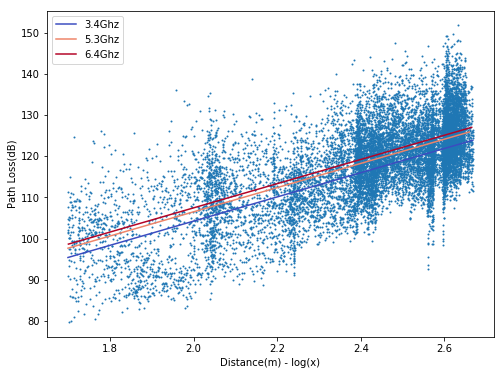

RMSE(dB),train error,test error
3.4Ghz,7.16563,6.86137
5.3Ghz,7.16396,7.22813
6.4Ghz,7.84389,7.52361
Overall,7.39306,7.20822


In [31]:
%autoreload
model = None
model = lassoRegression(X_train_bh, y_train_bh,X_val_bh, y_val_bh,X_test_bh, y_test_bh,'linear regression')
print("Estimated coefficients[w1(log-dist),w2(freq)]: " + str(model.coef_))
print("Estimated bias: " + str(model.intercept_))

print("<Bundang>")
linear_regression_multi_graph_comb(model, dataX_bh, X_train_bh[:,0], y_train_bh)

las_bh_stat = np.array([lin_prediction_error(model,X_train_bh_34, y_train_bh_34),lin_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 lin_prediction_error(model,X_train_bh_53, y_train_bh_53),lin_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 lin_prediction_error(model,X_train_bh_64, y_train_bh_64),lin_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 lin_prediction_error(model,X_train_bh, y_train_bh), lin_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(las_bh_stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

Estimated coefficients[w1(log-dist),w2(freq)]: [35.52468027 15.39843317]
Estimated bias: -20.48893802002783
<Mokdong>


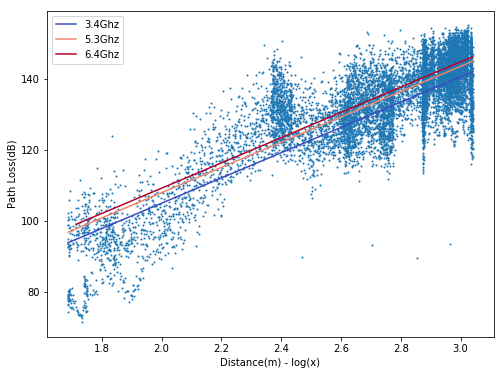

RMSE(dB),train error,test error
3.4Ghz,8.07421,7.87870
5.3Ghz,6.64401,6.68108
6.4Ghz,6.91763,6.33530
Overall,7.21434,6.97381


In [32]:
%autoreload
model = None
model = lassoRegression(X_train_ma, y_train_ma, X_val_ma, y_val_ma, X_test_ma, y_test_ma,'linear regression')
print("Estimated coefficients[w1(log-dist),w2(freq)]: " + str(model.coef_))
print("Estimated bias: " + str(model.intercept_))

print("<Mokdong>")
linear_regression_multi_graph_comb(model, dataX_ma, X_train_ma[:,0], y_train_ma)

las_ma_stat = np.array([lin_prediction_error(model,X_train_ma_34, y_train_ma_34),lin_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 lin_prediction_error(model,X_train_ma_53, y_train_ma_53),lin_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 lin_prediction_error(model,X_train_ma_64, y_train_ma_64),lin_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 lin_prediction_error(model,X_train_ma, y_train_ma), lin_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(las_ma_stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))